## Capture-Mark-Recapture model in PyMC3

Lets say the population size (which is normally unknown) is 1000 individuals. We will capture and mark 50 the first round, so now 50/1000 or 5% are marked. The next round another 200 individuals are captured, so we would expect to catch 5% marked ones or 10. 

So we have an unknown population_size, which is a flat distribution where only a lower bound can be set, a probability (p_marked) of recapturing a marked individual, the number of marked individual divided by the population size. An our observation of 2 recaptured individuals with a binomial likelihood of drawing 200 times with a probability for success of p_marked.

In [1]:
%load_ext nb_black
import pymc3 as pm
import matplotlib.pyplot as plt

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


<IPython.core.display.Javascript object>

In [2]:
n_marked = 50
captured_round_2 = 200
n_recaptured = 10

with pm.Model() as model:
    population_size = pm.Bound(
        pm.Flat, lower=n_marked + captured_round_2 - n_recaptured
    )("population_size")
    p_marked = pm.Deterministic("p_marked", n_marked / population_size)

    recapture_obs = pm.Binomial(
        "recapture_obs", captured_round_2, p_marked, observed=n_recaptured
    )

    trace = pm.sample(4000, tune=1000, return_inferencedata=False)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [population_size]


Sampling 4 chains for 1_000 tune and 4_000 draw iterations (4_000 + 16_000 draws total) took 16 seconds.


<IPython.core.display.Javascript object>

<Figure size 700x700 with 0 Axes>

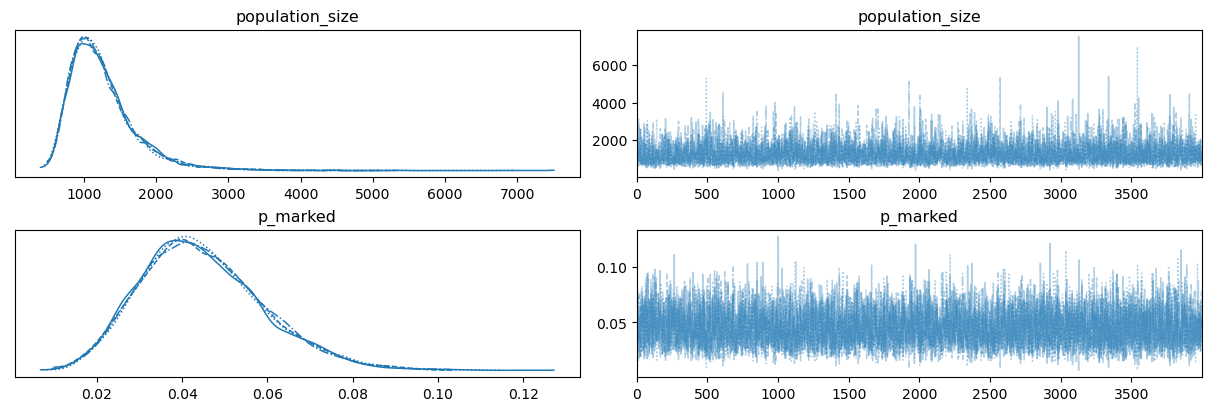

<IPython.core.display.Javascript object>

In [3]:
with model:
    plt.figure(figsize=(7, 7))
    pm.plot_trace(trace)
    plt.show()

In [4]:
with model:
    stats_df = pm.summary(trace)
stats_df

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
population_size,1251.403,469.289,572.104,2092.825,5.578,3.945,6835.0,10531.0,1.0
p_marked,0.045,0.015,0.020,0.073,0.000,0.000,6835.0,10540.0,1.0


<IPython.core.display.Javascript object>